In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
db = pd.read_csv("Signal.csv", sep = ",")
db.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
print(db.shape)

(1599, 12)


In [4]:
#Checking for Null values
db.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [5]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
corr = db.corr()
corr

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
Parameter 2,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
Parameter 3,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
Parameter 4,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
Parameter 5,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
Parameter 6,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
Parameter 7,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
Parameter 8,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
Parameter 9,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
Parameter 10,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


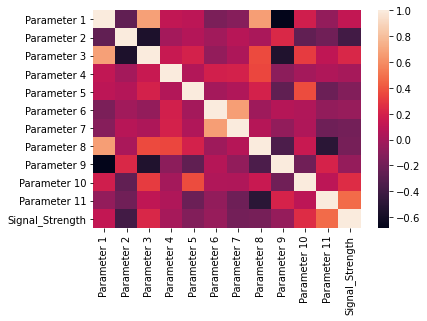

In [7]:
#Heat Map
sns.heatmap(corr)
plt.show()

In [8]:
# dividing dataframe into target and individual variables.
X = db.drop("Signal_Strength", axis = 1)
Y = db["Signal_Strength"]

model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [9]:
print(model.feature_importances_)

#feature_importances is an inbuilt class for tree based classifiers

[0.07625309 0.09801904 0.08156758 0.07960914 0.07618677 0.07496102
 0.10116914 0.08463761 0.07424112 0.10075833 0.15259716]


 Parameter 11 is the most effective.

In [10]:
# Training and Testing
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=50)

In [11]:
# Scaling training and testing data
X_Train_S = StandardScaler().fit_transform(X_Train)   

X_Test_S = StandardScaler().fit_transform(X_Test) 

-- Forward Propagation.

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras import optimizers

In [13]:
NN_model_Regressor = Sequential()

#The Input layer. 
NN_model_Regressor.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

#The Hidden layers. 
NN_model_Regressor.add(Dense(64, kernel_initializer='normal',activation='relu')) 

NN_model_Regressor.add(Dense(32, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

NN_model_Regressor.add(Dense(16, kernel_initializer='normal'))
NN_model_Regressor.add(LeakyReLU(alpha=0.1))


#The Output layer. 
NN_model_Regressor.add(Dense(1, kernel_initializer='normal'))  # except softmax
NN_model_Regressor.add(LeakyReLU(alpha=0.1))

#Compiling Network.
NN_model_Regressor.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1

In [14]:
# Fit
EPOCH = 350
Network_Regressor=NN_model_Regressor.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/350
6/6 [==============================] - 0s 31ms/step - loss: 5.6601 - accuracy: 0.0000e+00 - val_loss: 5.5602 - val_accuracy: 0.0000e+00
Epoch 2/350
6/6 [==============================] - 0s 4ms/step - loss: 5.6473 - accuracy: 0.0000e+00 - val_loss: 5.5422 - val_accuracy: 0.0000e+00
Epoch 3/350
6/6 [==============================] - 0s 5ms/step - loss: 5.6231 - accuracy: 0.0000e+00 - val_loss: 5.5039 - val_accuracy: 0.0000e+00
Epoch 4/350
6/6 [==============================] - 0s 4ms/step - loss: 5.5683 - accuracy: 0.0000e+00 - val_loss: 5.4131 - val_accuracy: 0.0000e+00
Epoch 5/350
6/6 [==============================] - 0s 4ms/step - loss: 5.4365 - accuracy: 0.0000e+00 - val_loss: 5.1955 - val_accuracy: 0.0000e+00
Epoch 6/350
6/6 [==============================] - 0s 5ms/step - loss: 5.1261 - accuracy: 0.0000e+00 - val_loss: 4.6966 - val_accuracy: 0.0000e+00
Epoch 7/350
6/6 [==============================] - 0s 5ms/step - loss: 4.4383 - accuracy: 0.0000e+00 - val_loss: 3.61

6/6 [==============================] - 0s 6ms/step - loss: 0.5124 - accuracy: 0.0000e+00 - val_loss: 0.5090 - val_accuracy: 0.0000e+00
Epoch 57/350
6/6 [==============================] - 0s 7ms/step - loss: 0.5117 - accuracy: 0.0000e+00 - val_loss: 0.5195 - val_accuracy: 0.0000e+00
Epoch 58/350
6/6 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.0000e+00 - val_loss: 0.5206 - val_accuracy: 0.0000e+00
Epoch 59/350
6/6 [==============================] - 0s 5ms/step - loss: 0.5079 - accuracy: 0.0000e+00 - val_loss: 0.5092 - val_accuracy: 0.0000e+00
Epoch 60/350
6/6 [==============================] - 0s 5ms/step - loss: 0.5121 - accuracy: 0.0000e+00 - val_loss: 0.5111 - val_accuracy: 0.0000e+00
Epoch 61/350
6/6 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.0000e+00 - val_loss: 0.5370 - val_accuracy: 0.0000e+00
Epoch 62/350
6/6 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.0000e+00 - val_loss: 0.5088 - va

6/6 [==============================] - 0s 5ms/step - loss: 0.4783 - accuracy: 0.0000e+00 - val_loss: 0.4917 - val_accuracy: 0.0000e+00
Epoch 112/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.0000e+00 - val_loss: 0.4880 - val_accuracy: 0.0000e+00
Epoch 113/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.0000e+00 - val_loss: 0.4843 - val_accuracy: 0.0000e+00
Epoch 114/350
6/6 [==============================] - ETA: 0s - loss: 0.4847 - accuracy: 0.0000e+ - 0s 4ms/step - loss: 0.4760 - accuracy: 0.0000e+00 - val_loss: 0.4950 - val_accuracy: 0.0000e+00
Epoch 115/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.0000e+00 - val_loss: 0.4850 - val_accuracy: 0.0000e+00
Epoch 116/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4728 - accuracy: 0.0000e+00 - val_loss: 0.5043 - val_accuracy: 0.0000e+00
Epoch 117/350
6/6 [==============================] - 0s 5ms/step - loss: 0

6/6 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.0000e+00 - val_loss: 0.4812 - val_accuracy: 0.0000e+00
Epoch 166/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4559 - accuracy: 0.0000e+00 - val_loss: 0.4797 - val_accuracy: 0.0000e+00
Epoch 167/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.0000e+00 - val_loss: 0.4946 - val_accuracy: 0.0000e+00
Epoch 168/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.0000e+00 - val_loss: 0.4983 - val_accuracy: 0.0000e+00
Epoch 169/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4532 - accuracy: 0.0000e+00 - val_loss: 0.4828 - val_accuracy: 0.0000e+00
Epoch 170/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4538 - accuracy: 0.0000e+00 - val_loss: 0.4828 - val_accuracy: 0.0000e+00
Epoch 171/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.0000e+00 - val_loss: 0.480

6/6 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.0000e+00 - val_loss: 0.4775 - val_accuracy: 0.0000e+00
Epoch 220/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4317 - accuracy: 0.0000e+00 - val_loss: 0.4712 - val_accuracy: 0.0000e+00
Epoch 221/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4305 - accuracy: 0.0000e+00 - val_loss: 0.4882 - val_accuracy: 0.0000e+00
Epoch 222/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4315 - accuracy: 0.0000e+00 - val_loss: 0.4975 - val_accuracy: 0.0000e+00
Epoch 223/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4292 - accuracy: 0.0000e+00 - val_loss: 0.4824 - val_accuracy: 0.0000e+00
Epoch 224/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.0000e+00 - val_loss: 0.4792 - val_accuracy: 0.0000e+00
Epoch 225/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.0000e+00 - val_loss: 0.486

6/6 [==============================] - 0s 5ms/step - loss: 0.4191 - accuracy: 0.0000e+00 - val_loss: 0.4873 - val_accuracy: 0.0000e+00
Epoch 274/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4163 - accuracy: 0.0000e+00 - val_loss: 0.4803 - val_accuracy: 0.0000e+00
Epoch 275/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.0000e+00 - val_loss: 0.4825 - val_accuracy: 0.0000e+00
Epoch 276/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4166 - accuracy: 0.0000e+00 - val_loss: 0.4877 - val_accuracy: 0.0000e+00
Epoch 277/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.0000e+00 - val_loss: 0.4859 - val_accuracy: 0.0000e+00
Epoch 278/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4186 - accuracy: 0.0000e+00 - val_loss: 0.4780 - val_accuracy: 0.0000e+00
Epoch 279/350
6/6 [==============================] - 0s 4ms/step - loss: 0.4210 - accuracy: 0.0000e+00 - val_loss: 0.485

6/6 [==============================] - 0s 4ms/step - loss: 0.4063 - accuracy: 0.0000e+00 - val_loss: 0.4833 - val_accuracy: 0.0000e+00
Epoch 329/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4045 - accuracy: 0.0000e+00 - val_loss: 0.4948 - val_accuracy: 0.0000e+00
Epoch 330/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.0000e+00 - val_loss: 0.5009 - val_accuracy: 0.0000e+00
Epoch 331/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.0000e+00 - val_loss: 0.5253 - val_accuracy: 0.0000e+00
Epoch 332/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.0000e+00 - val_loss: 0.5007 - val_accuracy: 0.0000e+00
Epoch 333/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4108 - accuracy: 0.0000e+00 - val_loss: 0.4893 - val_accuracy: 0.0000e+00
Epoch 334/350
6/6 [==============================] - 0s 5ms/step - loss: 0.4034 - accuracy: 0.0000e+00 - val_loss: 0.487

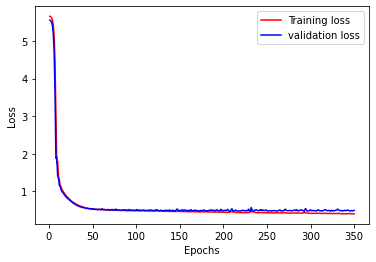

In [15]:
loss_train = Network_Regressor.history['loss']
loss_val = Network_Regressor.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Pickling the model for future use.

In [19]:
from keras.models import model_from_json
import os

R_json = NN_model_Regressor.to_json()
with open("Regressor_model.json", "w") as json_file:
    json_file.write(R_json)

NN_model_Regressor.save_weights("Regressor_model.h5")
print("Saved")

Saved
